In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("micro_credit.csv",parse_dates=['pdate'])
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
df.shape

(209593, 37)

There are 209593 entries corresponding to 37 attributes.

Here the target variable is label, it tells us whether the costumer paid back the amount in five days.
0:failure and 1: success => it is a classification problem

In [4]:
# Dropping the first column which only provides the sl.no

df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
# As the msisdn refers to the mobile number of the user, it does not carry much influence on target=> we set it as index

df.set_index('msisdn',inplace=True)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
msisdn,,,,,,,,,,,,,,,,,,,,,
21408I70789,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
76462I70374,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
17943I70372,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
55773I70781,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
03813I82730,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [6]:
# from the attribute discription, we can gather that no entries can be negative => hence dropping rows consisting of negative values

for cols in df.columns.tolist()[1:-2]:
    df = df[df[cols] >= 0]

In [7]:
# Checking the assigned datatype

df.dtypes

label                            int64
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_date_da              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30              float64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_da_rech30                  float64
fr_da_rech30                   float64
cnt_da_rech90                    int64
fr_da_rech90                     int64
cnt_loans30                      int64
amnt_loans30                     int64
maxamnt_loans30          

We can see that none of the attributes ae assigned wrong datattypes

In [8]:
# splitting date column into year, month and day

df['day'] = df['pdate'].dt.day
df['month'] = df['pdate'].dt.month
df['year'] = df['pdate'].dt.year

In [9]:
df['year'].unique()

array([2016], dtype=int64)

All entries are of the same year, hence it is not relavent to the target.

We also have gathered the required information from the column - pdate.

Hence columns pdate and year can be dropped.

In [10]:
df.drop('year',axis=1,inplace=True)
df.drop('pdate',axis=1,inplace=True)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,day,month
msisdn,,,,,,,,,,,,,,,,,,,,,
21408I70789,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20,7
76462I70374,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10,8
17943I70372,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19,8
55773I70781,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6,6
03813I82730,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22,6


In [11]:
# unique entries in pcircle

df['pcircle'].unique()

array(['UPW'], dtype=object)

All entries are of the same p circle and hence does not have any affect on the target variable.

In [12]:
df.drop('pcircle',axis=1,inplace=True)

In [13]:
# Checking for null values

df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
day                     0
month                   0
dtype: int64

From the above output, we can see that the dataset has no null values.

In [14]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month
count,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,...,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000
mean,0.881799,8162.963611,5629.008544,6368.178216,2825.292433,3659.612118,3832.937763,3767.099897,2015.997639,4.080681,...,274.452782,0.054041,18.521334,24.337501,6.733623,0.045664,3.478497,4.438088,14.428950,6.830459
std,0.322847,75950.972626,9395.237972,11137.380436,4362.599547,5851.924127,54473.489187,53766.096400,2270.835102,4.302792,...,4244.323635,0.218397,224.126810,26.922492,2.143026,0.200117,8.850613,10.379959,8.421646,0.741125
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,1.000000,249.000000,47.058000,47.300000,331.960000,380.790000,1.000000,0.000000,770.000000,1.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.000000,6.000000
50%,1.000000,528.000000,1740.000000,1784.740000,1187.120000,1474.070000,3.000000,0.000000,1539.000000,3.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,1.000000,1.857143,14.000000,7.000000
75%,1.000000,979.000000,7650.000000,8283.520000,3552.610000,4419.760000,7.000000,0.000000,2309.000000,6.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,4.000000,4.666667,21.000000,7.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.000000,8.000000


Looking at the difference between mean and maximum values of the columns, we can see that the data consists of outliers.

For example: aon refers to age on cellular network in days, the maximum value corresponding to the column is 999860.755 which is not practical.

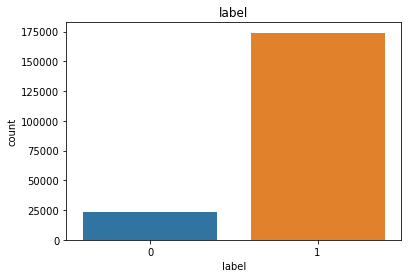

In [15]:
# Target variable - label

sns.countplot(df['label'])
plt.title("label")
plt.show()

As seen from the countplot, most of the costumers were able to pay back in five days. The data is imbalanced.

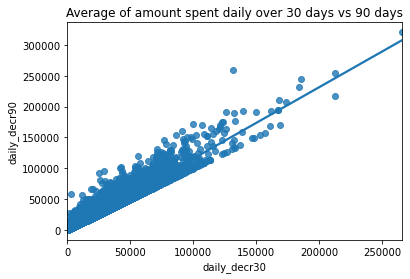

In [16]:
# Average amount spent daily : 30 days vs 90 days

sns.regplot(df['daily_decr30'],df['daily_decr90'])
plt.title("Average of amount spent daily over 30 days vs 90 days")
plt.show()

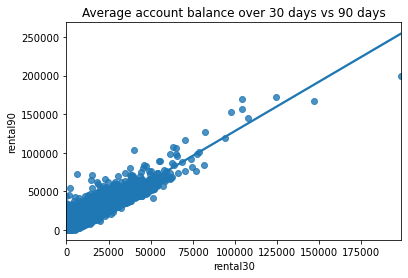

In [17]:
# Average account balance over 30 days vs 90 days

sns.regplot(df['rental30'],df['rental90'])
plt.title("Average account balance over 30 days vs 90 days")
plt.show()

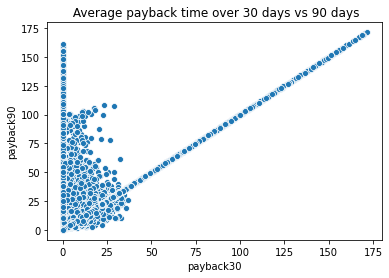

In [18]:
# Average payback time over over 30 days vs 90 days

sns.scatterplot(df['payback30'],df['payback90'])
plt.title(" Average payback time over 30 days vs 90 days")
plt.show()

Clearly we can see a positive linear relationship between the attributes in the above plots.

To further understand their inter-dependence we look at correlation.

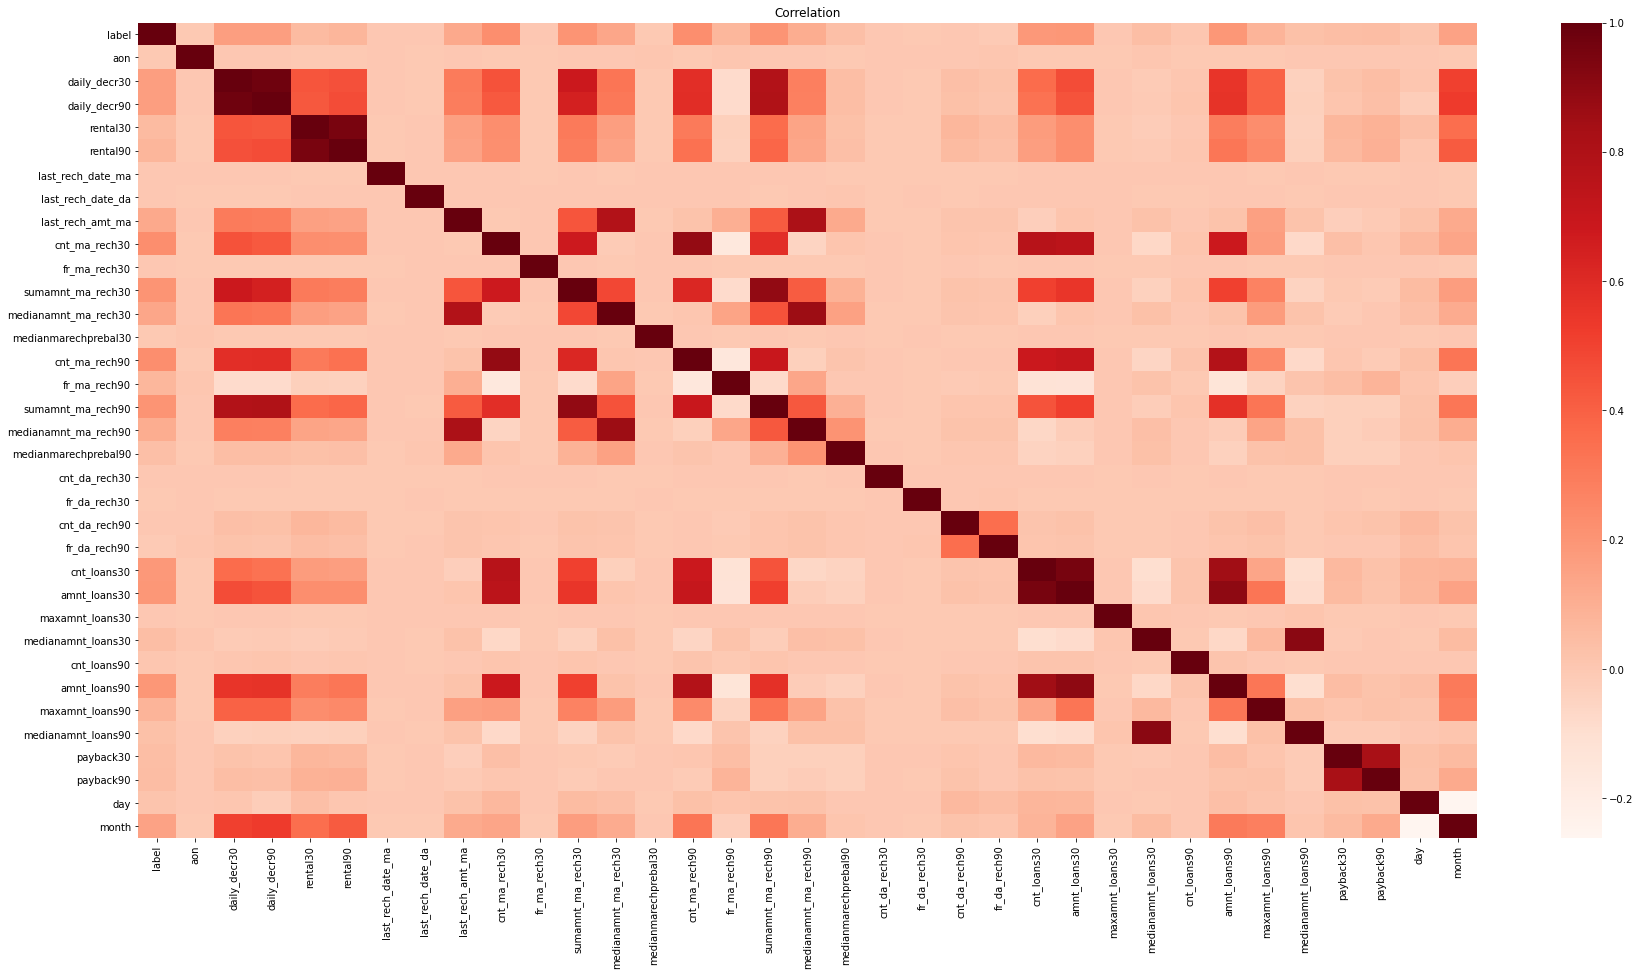

In [20]:
# Correlation using heatmap 

plt.figure(figsize=(30,15))
plt.title("Correlation")
sns.heatmap(df.corr(),cmap='Reds')
plt.show()

For getting better results by performing PCA all the attributes must have a good correlation. As this is not the case we see in the heatmap we resort to manual feature selection to reduce dimensions.

In most of the cases, we can see that data collected over 30 days has high(>0.75) correlation with the data collected over 90 days.

For example:
    Average of amount spent daily over 30 days vs 90 days has a correlatio of 0.98
    Average payback time over 30 days vs 90 days has a correlation of 0.83
    
Keeping one such attribute and removing other highly correlated attributes will result in reduction of dimensions.

In [21]:
for i in ['daily_decr30','rental30','cnt_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','amnt_loans30','medianamnt_loans30','payback30']:
    df.drop(i,axis=1,inplace=True)
df.head()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,medianmarechprebal30,cnt_ma_rech90,...,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,day,month
msisdn,,,,,,,,,,,,,,,,,,,,,
21408I70789,0,272.0,3065.150000,260.13,2.0,0.0,1539,21.0,7.50,2,...,0,2,6.0,2.0,12,6,0.0,29.000000,20,7
76462I70374,1,712.0,12124.750000,3691.26,20.0,0.0,5787,0.0,61.04,1,...,0,1,12.0,1.0,12,12,0.0,0.000000,10,8
17943I70372,1,535.0,1398.000000,900.13,3.0,0.0,1539,0.0,66.32,1,...,0,1,6.0,1.0,6,6,0.0,0.000000,19,8
55773I70781,1,241.0,21.228000,159.42,41.0,0.0,947,0.0,0.00,1,...,0,2,6.0,2.0,12,6,0.0,0.000000,6,6
03813I82730,1,947.0,150.619333,1098.90,4.0,0.0,2309,2.0,29.00,8,...,0,7,6.0,7.0,42,6,0.0,2.333333,22,6


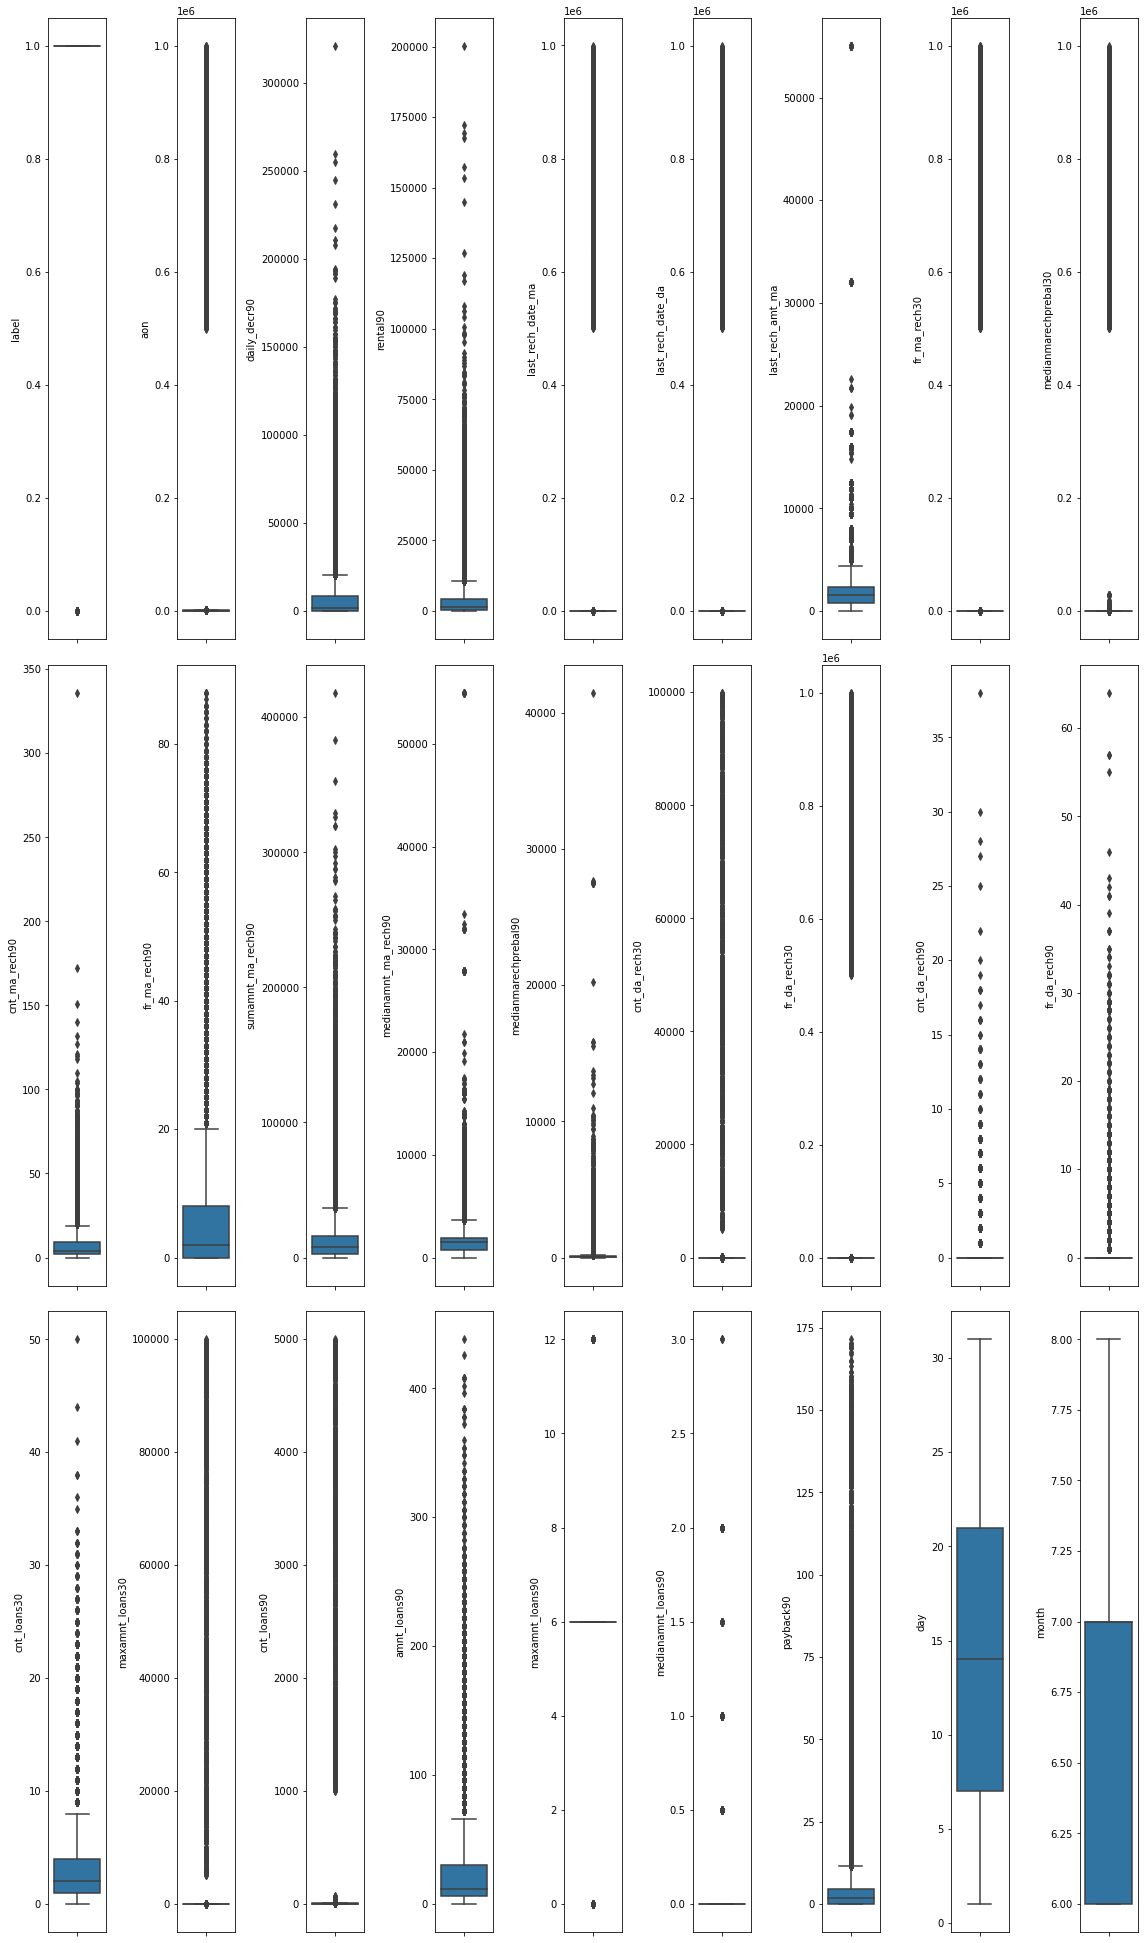

In [22]:
# Checking for outliers

collist = df.columns.values
ncol = 9
nrows = 5

plt.figure(figsize=(16,5*ncol))
for i in range(len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],orient = "v")
    plt.tight_layout()

From the boxplot, we can see that the dataset consists of outliers.

We look at the z score and then remove outliers.

In [23]:
# Removing outliers

from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,medianmarechprebal30,cnt_ma_rech90,...,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,day,month
msisdn,,,,,,,,,,,,,,,,,,,,,
21408I70789,0,272.0,3065.150000,260.13,2.0,0.0,1539,21.0,7.50,2,...,0,2,6.0,2.0,12,6,0.0,29.000000,20,7
76462I70374,1,712.0,12124.750000,3691.26,20.0,0.0,5787,0.0,61.04,1,...,0,1,12.0,1.0,12,12,0.0,0.000000,10,8
17943I70372,1,535.0,1398.000000,900.13,3.0,0.0,1539,0.0,66.32,1,...,0,1,6.0,1.0,6,6,0.0,0.000000,19,8
55773I70781,1,241.0,21.228000,159.42,41.0,0.0,947,0.0,0.00,1,...,0,2,6.0,2.0,12,6,0.0,0.000000,6,6
03813I82730,1,947.0,150.619333,1098.90,4.0,0.0,2309,2.0,29.00,8,...,0,7,6.0,7.0,42,6,0.0,2.333333,22,6


In [24]:
df.shape

(197333, 27)

In [25]:
df_new.shape

(152482, 27)

In [26]:
# Splitting independent variables and target

x = df_new.drop('label',axis=1)
y = df_new[['label']]

In [27]:
# Using Standard scaler for uniform range in all columns

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)

Oversampling

As we have an imbalanced dataset, to predict both the categories accurately it is necessary to use undersampling or oversampling. To not lose relavent data through undersampling we go ahead with oversampling.

In [28]:
# Oversampling

# !pip install imbalanced-learn
import imblearn
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.5)
x,y=oversample.fit_resample(x,y)
print(x.shape)
print(y.shape)

(198768, 26)
(198768, 1)


In [29]:
# Importing necessary metrics and algorithms

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

As the training data is large, we use high variance algorithms.

We use logistic regression to check the linearity of the data.

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y,random_state=0)

In [32]:
model = [SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),LogisticRegression()]

for m in model:
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("Accuracy score of", m,"is",accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")

0.826411510936144
Accuracy score of SVC() is 0.8227599738391105
[[ 9510  3741]
 [ 3305 23198]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73     13251
           1       0.86      0.88      0.87     26503

    accuracy                           0.82     39754
   macro avg       0.80      0.80      0.80     39754
weighted avg       0.82      0.82      0.82     39754



0.9999811337366521
Accuracy score of DecisionTreeClassifier() is 0.9346983951300498
[[12832   419]
 [ 2177 24326]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     13251
           1       0.98      0.92      0.95     26503

    accuracy                           0.93     39754
   macro avg       0.92      0.94      0.93     39754
weighted avg       0.94      0.93      0.94     39754



0.8936571622624423
Accuracy score of KNeighborsClassifier() is 0.836871761332193
[[11043  2208]
 [ 4277 22226]]
              precis

The decision tree classifier is the best fitted algorithm. It has high accuracy score and also the f1 score for both the labels are high. Hence, we proceed with Decision Tree Classifier. 

In [33]:
# Hyperparameter tuning using gridsearch CV on decision tree classifier

from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
p = {'criterion':['gini', 'entropy'], 'splitter':['best','random'],'max_depth' : [None,2,4,6,8],'random_state': range(0,100)}
a = GridSearchCV(dtc,p)
a.fit(x,y)
a.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'random_state': 48,
 'splitter': 'best'}

Using the above parameters in decision tree classifier.

In [34]:
dtc = DecisionTreeClassifier(criterion='entropy',splitter='best',random_state=48) # max_depth = none is default
dtc.fit(x_train,y_train)
print(dtc.score(x_train,y_train))
pred=dtc.predict(x_test)
print("Accuracy score of", dtc,"is",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9999811337366521
Accuracy score of DecisionTreeClassifier(criterion='entropy', random_state=48) is 0.9372390199728329
[[12809   442]
 [ 2053 24450]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     13251
           1       0.98      0.92      0.95     26503

    accuracy                           0.94     39754
   macro avg       0.92      0.94      0.93     39754
weighted avg       0.94      0.94      0.94     39754



In [35]:
# cross_val_score

from sklearn.model_selection import cross_val_score

print("Cross_val_score for",dtc ,'is ',cross_val_score(dtc,x,y,cv=5).mean())

Cross_val_score for DecisionTreeClassifier(criterion='entropy', random_state=48) is  0.9419021665404591


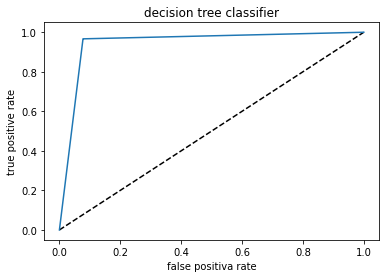

roc_auc_score:  0.9445905490704234


In [36]:
# auc_roc curve

from sklearn.metrics import roc_curve
y_pred_prob= dtc.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'decision tree clasifier')
plt.xlabel("false positiva rate")
plt.ylabel("true positive rate")
plt.title("decision tree classifier")
plt.show()
print("roc_auc_score: ",roc_auc_score(y_test,pred))

From the auc_roc score, cross_val_score and the auc_roc curve we can gather that there is no overfitting. Hence decision tree classifier is the best suited model for this problem.

We save the model for future use.

In [37]:
# Saving the model

import joblib
joblib.dump(dtc,"micro_credit_loan.pkl")

['micro_credit_loan.pkl']